### Model Deployment: YOLOv8n op nieuwe afbeeldingen

In deze notebook gebruiken we een getraind YOLOv8n om objecten te detecteren in **nieuwe, ongeziene geveltekeningen**.



Deze notebook is bedoeld om het model toe te passen in de praktijk, los van het trainingsproces.


In [3]:
# 📦 Benodigde imports
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from PIL import Image





image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test1.jpg: 640x640 1 facade, 7 windows, 13.6ms
Speed: 4.6ms preprocess, 13.6ms inference, 71.3ms postprocess per image at shape (1, 3, 640, 640)


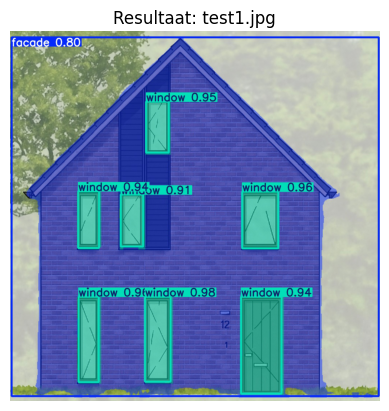


image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test2.jpg: 640x640 1 facade, 4 windows, 11.2ms
Speed: 3.7ms preprocess, 11.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


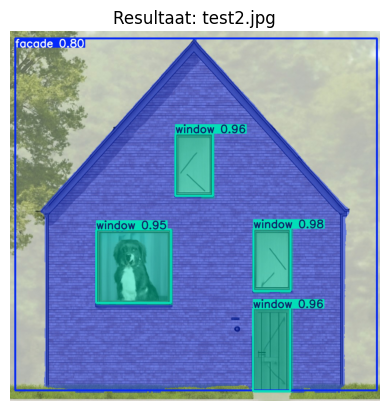


image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test3.jpg: 640x640 1 facade, 4 windows, 14.5ms
Speed: 5.0ms preprocess, 14.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


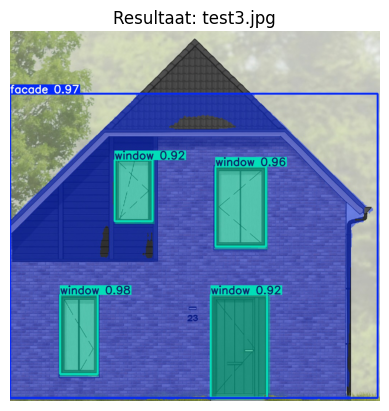


image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test4.jpg: 640x640 1 facade, 4 windows, 12.6ms
Speed: 4.2ms preprocess, 12.6ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


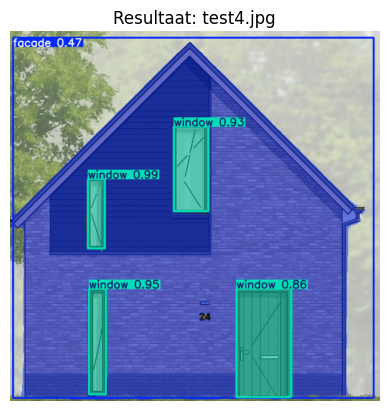


image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test5.jpg: 640x640 1 facade, 7 windows, 9.3ms
Speed: 3.9ms preprocess, 9.3ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


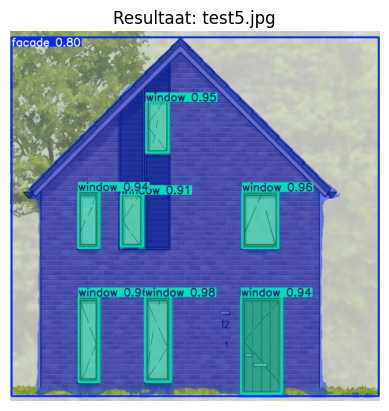


image 1/1 C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels\test6.jpg: 640x640 2 facades, 1 roof, 2 trees, 6 windows, 10.1ms
Speed: 4.1ms preprocess, 10.1ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


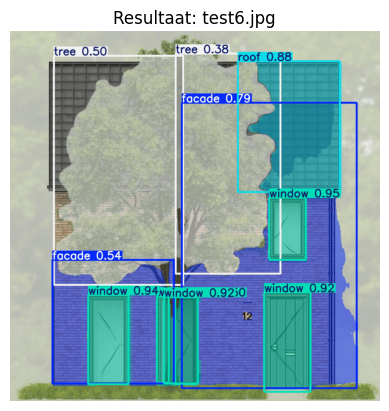

In [2]:
# 🔧 Pad naar jouw getrainde model (.pt-bestand)
model_path = r"/yolov8n_nest_50epochs.pt"
model = YOLO(model_path)

# 📂 Map met nieuwe afbeeldingen om op te testen
input_folder = r"C:\Users\karoo\CLONED\Nest-Project\Nest-Project\AI_generated_gevels"

# 📁 Map om resultaten op te slaan
output_folder = r"C:\Users\karoo\CLONED\Nest-Project\Nest-Project\output_resultaten"
os.makedirs(output_folder, exist_ok=True)

# 🔄 Verwerk elke afbeelding in de inputmap
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(input_folder, filename)

        # 🔍 Voorspelling uitvoeren
        results = model.predict(source=image_path, save=False)

        # 💾 Resultaat opslaan
        save_path = os.path.join(output_folder, f"result_{filename}")
        results[0].save(filename=save_path)

        # 📸 Resultaat weergeven in notebook
        img = Image.open(save_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Resultaat: {filename}")
        plt.show()

### ✅ Conclusie

Het YOLOv8-model presteert verrassend goed, zeker gezien de beperkte hoeveelheid trainingsdata (slechts ±60 afbeeldingen).
Ondanks deze kleine dataset is het model in staat om belangrijke objectklassen zoals ramen, gevels en daken te detecteren ook in complexere testbeelden zoals *Rijwoning 6*.

